### Import Libraries and Module

In [1]:
import glob
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

### Combine Lagos, Abuja and Port-harcourt Datasets and write to csv file

In [2]:
directory = r"/home/hildred/Desktop/Ustacky_PROJECTS/Data-Analysis-Project"
files = glob.glob(directory + "/*.csv")

In [3]:
file_list = []
for file in files:
    read_file = pd.read_csv(file, index_col=None, header=0)
    file_list.append(read_file)

In [4]:
data = pd.concat(file_list, axis=0, ignore_index=True)

In [5]:
s_data = data.sort_values(by = ['Branch']).reset_index(drop=True)

In [6]:
s_data.to_csv('supermarket_data.csv')

### Data Exploration

In [7]:
s_data.head()

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,0.0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,NaN,689-05-1884,A,Lagos,Member,Male,Health and beauty,17506.8,10,8753.40,183821.40,3/4/2019,12:44,Cash,175068.0,4.761905,8753.40,8.8
2,NaN,305-03-2383,A,Lagos,Normal,Female,Food and beverages,24156.0,3,3623.40,76091.40,2/15/2019,10:36,Cash,72468.0,4.761905,3623.40,7.5
3,NaN,648-83-1321,A,Lagos,Member,Male,Home and lifestyle,22881.6,10,11440.80,240256.80,1/16/2019,17:59,Cash,228816.0,4.761905,11440.80,4.3
4,NaN,105-10-6182,A,Lagos,Member,Male,Fashion accessories,7732.8,2,773.28,16238.88,2/27/2019,12:22,Epay,15465.6,4.761905,773.28,6.6


In [8]:
s_data.shape

(2000, 18)

In [9]:
s_data.columns

Index(['Unnamed: 0', 'Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
s_data.describe()

,Unnamed: 0,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.00000,2000.00000
mean,499.500000,20041.966800,5.510000,5536.57284,116268.029640,110731.456800,4.761905,5536.57284,6.97270
std,288.819436,9535.680197,2.922699,4214.12272,88496.577116,84282.454396,0.000000,4214.12272,1.71815
min,0.000000,3628.800000,1.000000,183.06000,3844.260000,3661.200000,4.761905,183.06000,4.00000
25%,249.750000,11835.000000,3.000000,2132.95500,44792.055000,42659.100000,4.761905,2132.95500,5.50000
50%,499.500000,19882.800000,5.000000,4351.68000,91385.280000,87033.600000,4.761905,4351.68000,7.00000
75%,749.250000,28056.600000,8.000000,8080.29000,169686.090000,161605.800000,4.761905,8080.29000,8.50000
max,999.000000,35985.600000,10.000000,17874.00000,375354.000000,357480.000000,4.761905,17874.00000,10.00000


## Inferences from statistical summary of supermarket data
#### ◘ Customers purchased an average of 5 products on each patronage
#### ◘ The cheapest item in all stores is about 3,630 naira while the most expensive is about 40,000 naira
#### ◘ Customer satisfaction across all stores is above average

In [11]:
s_data.isnull().sum()

Unnamed: 0                 1000
Invoice ID                    0
Branch                        0
City                          0
Customer type                 0
Gender                        0
Product line                  0
Unit price                    0
Quantity                      0
Tax 5%                        0
Total                         0
Date                          0
Time                          0
Payment                       0
cogs                          0
gross margin percentage       0
gross income                  0
Rating                        0
dtype: int64

In [12]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   float64
 1   Invoice ID               2000 non-null   object 
 2   Branch                   2000 non-null   object 
 3   City                     2000 non-null   object 
 4   Customer type            2000 non-null   object 
 5   Gender                   2000 non-null   object 
 6   Product line             2000 non-null   object 
 7   Unit price               2000 non-null   float64
 8   Quantity                 2000 non-null   int64  
 9   Tax 5%                   2000 non-null   float64
 10  Total                    2000 non-null   float64
 11  Date                     2000 non-null   object 
 12  Time                     2000 non-null   object 
 13  Payment                  2000 non-null   object 
 14  cogs                    

## Working with DateTime

#### • Convert Date

In [13]:
s_data['Date'] = pd.to_datetime(s_data['Date'])

In [14]:
s_data['Date'].dtype

dtype('<M8[ns]')

#### • Convert Time 

In [15]:
s_data["Time"] = pd.to_datetime(s_data['Time']).dt.time

In [16]:
s_data['Time'].iloc[1]

datetime.time(12, 44)

#### • Extract Days

In [17]:
days = s_data['Date'].dt.day

In [18]:
days

0        5
1        4
2       15
3       16
4       27
        ..
1995     2
1996     4
1997    16
1998     3
1999     3
Name: Date, Length: 2000, dtype: int64

#### • Extract Months

In [19]:
months = s_data['Date'].dt.month

In [20]:
months

0       1
1       3
2       2
3       1
4       2
       ..
1995    2
1996    3
1997    3
1998    2
1999    2
Name: Date, Length: 2000, dtype: int64

#### • Extract Year

In [21]:
year = s_data['Date'].dt.year

In [22]:
year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
1995    2019
1996    2019
1997    2019
1998    2019
1999    2019
Name: Date, Length: 2000, dtype: int64

#### • Extract Hour

In [23]:
hours = s_data['Time'].apply(lambda x: x.hour)

In [24]:
hours

0       13
1       12
2       10
3       17
4       12
        ..
1995    10
1996    20
1997    19
1998    10
1999    15
Name: Time, Length: 2000, dtype: int64

#### • Unique sales hours

In [25]:
hours.unique()

array([13, 12, 10, 17, 18, 19, 15, 14, 20, 16, 11])

## Unique values and number of unique values in categorical columns

#### • City

In [26]:
s_data['City'].unique()

array(['Lagos', 'Abuja', 'Port Harcourt'], dtype=object)

In [27]:
s_data['City'].value_counts()

Lagos            680
Abuja            664
Port Harcourt    656
Name: City, dtype: int64

#### • Customer type

In [28]:
s_data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [29]:
s_data['Customer type'].value_counts()

Member    1002
Normal     998
Name: Customer type, dtype: int64

#### • Gender

In [30]:
s_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [31]:
s_data['Gender'].value_counts()

Female    1002
Male       998
Name: Gender, dtype: int64

#### • Product line

In [32]:
s_data['Product line'].unique()

array(['Health and beauty', 'Food and beverages', 'Home and lifestyle',
       'Fashion accessories', 'Electronic accessories',
       'Sports and travel'], dtype=object)

In [33]:
s_data['Product line'].value_counts()

Fashion accessories       356
Food and beverages        348
Electronic accessories    340
Sports and travel         332
Home and lifestyle        320
Health and beauty         304
Name: Product line, dtype: int64

#### • Payment

In [34]:
s_data['Payment'].unique()

array(['Epay', 'Cash', 'Card'], dtype=object)

In [35]:
s_data['Payment'].value_counts()

Epay    690
Cash    688
Card    622
Name: Payment, dtype: int64

## Aggregation

In [36]:
city_groups = s_data.groupby('City')

In [37]:
total_agg = city_groups.agg(["sum", "mean"]).round(2)

In [38]:
total_agg

Unnamed: 0         Unit price           Quantity        \
                     sum   mean         sum      mean      sum  mean   
City                                                                   
Abuja           167826.0  505.5  13304793.6  20037.34     3640  5.48   
Lagos            57630.0  169.5  13410352.8  19721.11     3718  5.47   
Port Harcourt   274044.0  835.5  13368787.2  20379.25     3662  5.58   

                   Tax 5%                 Total                   cogs  \
                      sum     mean          sum       mean         sum   
City                                                                     
Abuja          3641063.04  5483.53  76462323.84  115154.10  72821260.8   
Lagos          3641155.56  5354.64  76464266.76  112447.45  72823111.2   
Port Harcourt  3790927.08  5778.85  79609468.68  121355.90  75818541.6   

                         gross margin percentage       gross income           \
                    mean                     sum  mean          sum     mean   
City                                                                           
Abuja          109670.57                 3161.90  4.76   3641063.04  5483.53   
Lagos          107092.81                 3238.10  4.76   3641155.56  5354.64   
Port Harcourt  115577.05                 3123.81  4.76   3790927.08  5778.85   

               Rating        
                  sum  mean  
City                         
Abuja          4527.2  6.82  
Lagos          4778.4  7.03  
Port Harcourt  4639.8  7.07

#### • Gross Income


In [39]:
gross_agg = city_groups.agg({'gross income': 'sum'}).round(2)

In [40]:
gross_agg

,gross income
City,
Abuja,3641063.04
Lagos,3641155.56
Port Harcourt,3790927.08


#### • City with the highest gross income

In [41]:
gross_agg.loc[gross_agg['gross income'] == gross_agg['gross income'].max()]

,gross income
City,
Port Harcourt,3790927.08


# Data Visualization

#### • Branch total sales

<AxesSubplot:xlabel='Branch', ylabel='count'>

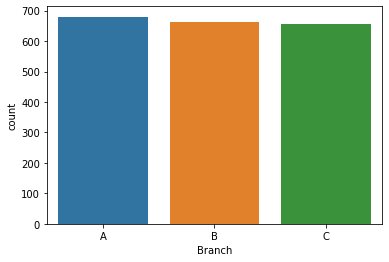

In [42]:
sb.countplot(x="Branch",data=s_data)

###### ‣Branch with highest sales record is  branch A

#### • Highest & Lowest sold product line

[None, None, None, None, None, None, None, None, None, None, None, None]

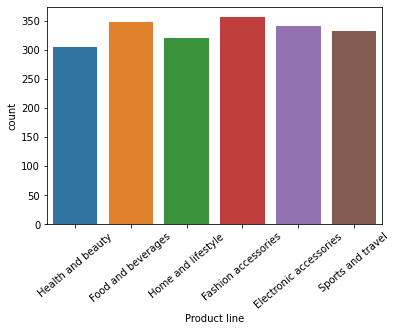

In [43]:
p_line_plot = sb.countplot(x="Product line",data=s_data)
plt.setp(p_line_plot.get_xticklabels(), rotation=40)

###### ‣Highest sold product line is Fashion accessories
###### ‣Lowest sold product line is  Health and beauty

#### • Most used payment channel

<AxesSubplot:xlabel='count', ylabel='Product line'>

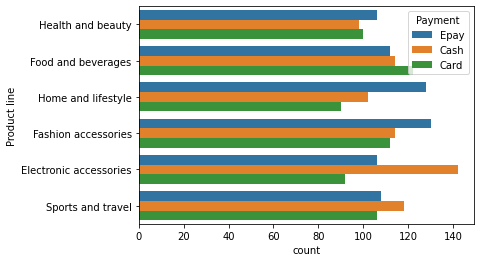

In [44]:
sb.countplot(y = "Product line" ,data=s_data, hue = "Payment")